In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from scipy.stats import shapiro,kstest,normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as sts

In [37]:
df=pd.read_csv('medical_insurance.csv')

In [38]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot: >

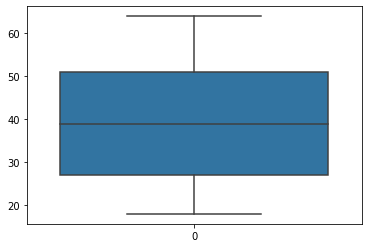

In [39]:
sns.boxplot(df['age'])

<AxesSubplot: >

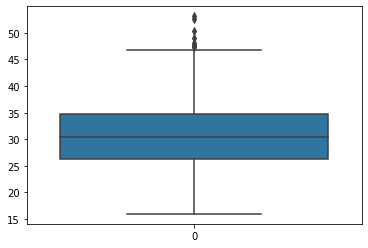

In [40]:
sns.boxplot(df['bmi'])

In [41]:
df['sex'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [42]:
df['sex'].replace({'male': 1, 'female': 0},inplace=True)

In [43]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [44]:
df['smoker'].replace({'no': 1064, 'yes': 274},inplace=True)

In [45]:
df['smoker']

0        274
1       1064
2       1064
3       1064
4       1064
        ... 
1333    1064
1334    1064
1335    1064
1336    1064
1337     274
Name: smoker, Length: 1338, dtype: int64

In [46]:
df=pd.get_dummies(df,columns=['region'])

In [47]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,274,16884.92400,0,0,0,1
1,18,1,33.770,1,1064,1725.55230,0,0,1,0
2,28,1,33.000,3,1064,4449.46200,0,0,1,0
3,33,1,22.705,0,1064,21984.47061,0,1,0,0
4,32,1,28.880,0,1064,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1064,10600.54830,0,1,0,0
1334,18,0,31.920,0,1064,2205.98080,1,0,0,0
1335,18,0,36.850,0,1064,1629.83350,0,0,1,0
1336,21,0,25.800,0,1064,2007.94500,0,0,0,1


,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,274,0,0,0,1
1,18,1,33.770,1,1064,0,0,1,0
2,28,1,33.000,3,1064,0,0,1,0
3,33,1,22.705,0,1064,0,1,0,0
4,32,1,28.880,0,1064,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1064,0,1,0,0
1334,18,0,31.920,0,1064,1,0,0,0
1335,18,0,36.850,0,1064,0,0,1,0
1336,21,0,25.800,0,1064,0,0,0,1


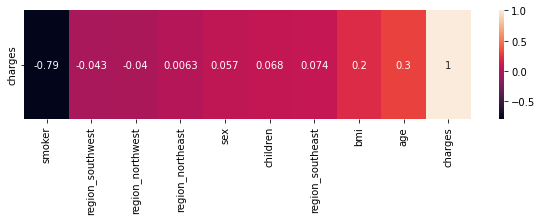

In [94]:
class assumption():
    def __init__(self,df):
        self.df=df
    
        
    def linearity(self):
        self.y=self.df['charges']
        self.x=self.df.drop('charges',axis=1)
        df=pd.concat([self.x,self.y],axis=1)
        
        corr=df.corr().tail(1).sort_values('charges',axis=1)
        corr
        plt.figure(figsize=(10,2))
        a=sns.heatmap(corr,annot=True)
        x=self.x
        y=self.y
        return x
        return y
        
    def nomulticolinearity(self):
        #self.x
        vif_list=[]
        for i in range(self.x.shape[1]):
            vif=variance_inflation_factor(self.x.to_numpy(),i)
            vif_list.append(vif)
        s1=pd.Series(vif_list,index=self.x.columns)
        #sns.figure(figsize=(10,10))
        return s1.sort_values().plot(kind='barh')
obj=assumption(df)
obj.linearity()


<AxesSubplot: >

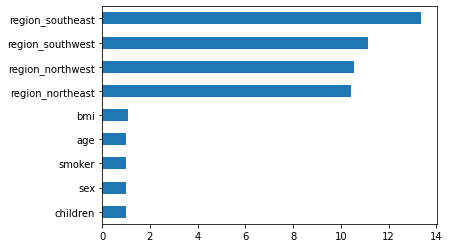

In [65]:
obj.nomulticolinearity()

In [122]:
class model_build(assumption):
    def __init__(self,df):
        self.df=df
        assumption.__init__(self,self.df)
        
        
    def data_split(self):

        self.x_train,self.x_test,self.y_train,self.y_test=train_test_split(x,y,test_size=0.2,random_state=10)
        return self.x_train
    
    def train(self):
        self.x_train
        self.x_test
        self.y_train
        self.y_test
        self.lr_model=LinearRegression()
        self.lr_model.fit(self.x_train,self.y_train)
    
    def evalution_for_train(self):
        self.x_train
        self.x_test
        self.y_train
        self.y_test
        y_pred=self.lr_model.predict(self.x_train)
        mse=mean_squared_error(self.y_train,y_pred)
        print('MSE:',mse)
        mae=mean_absolute_error(self.y_train,y_pred)
        print('MAE:',mae)
        rmse=np.sqrt(mse)
        print('RMSE:',rmse)
        r2=r2_score(self.y_train,y_pred)
        print('R2_Score:',r2)
    
    def evalution_for_test(self):
        self.data_split()
        self.y_test
        y_pred_test=self.lr_model.predict(self.x_test)
        mse=mean_squared_error(self.y_test,y_pred_test)
        print('MSE:',mse)
        mae=mean_absolute_error(self.y_test,y_pred_test)
        print('MAE:',mae)
        rmse=np.sqrt(mse)
        print('RMSE:',rmse)
        r2=r2_score(self.y_test,y_pred_test)
        print('R2_Score:',r2)


In [123]:
ass=model_build(df)

In [124]:
ass.data_split()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
559,19,1,35.530,0,1064,0,1,0,0
273,50,1,27.455,1,1064,1,0,0,0
471,18,0,30.115,0,1064,1,0,0,0
22,18,1,34.100,0,1064,0,0,1,0
939,53,1,29.480,0,1064,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1180,42,0,41.325,1,1064,1,0,0,0
1147,20,0,31.920,0,1064,0,1,0,0
527,51,0,25.800,1,1064,0,0,0,1
1149,42,1,34.100,0,1064,0,0,0,1


In [125]:
ass.train()

In [127]:
ass.evalution_for_train()

MSE: 35000135.31385896
MAE: 4080.1255429909843
RMSE: 5916.0912191969255
R2_Score: 0.7636624681782705


In [126]:
ass.evalution_for_test()

MSE: 42730364.683872476
MAE: 4555.098582513369
RMSE: 6536.84669270073
R2_Score: 0.6953286838318304


In [49]:
def linearity(df):
    y=df['charges']
    x=df.drop('charges',axis=1)
    df=pd.concat([y,x],axis=1)
    corr=df.corr().tail(1).sort_values('charges',axis=1)
    corr
    plt.figure(figsize=(10,2))
    a=sns.heatmap(corr,annot=True)
    print(a)
linearity(df)

KeyError: 'charges'

In [54]:
y=df['charges']
x=df.drop('charges',axis=1)
df=pd.concat([x,y],axis=1)
df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,274,0,0,0,1,16884.92400
1,18,1,33.770,1,1064,0,0,1,0,1725.55230
2,28,1,33.000,3,1064,0,0,1,0,4449.46200
3,33,1,22.705,0,1064,0,1,0,0,21984.47061
4,32,1,28.880,0,1064,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1064,0,1,0,0,10600.54830
1334,18,0,31.920,0,1064,1,0,0,0,2205.98080
1335,18,0,36.850,0,1064,0,0,1,0,1629.83350
1336,21,0,25.800,0,1064,0,0,0,1,2007.94500
